# Тестовое задание на позицию Junior Data Scientist
Страница с данными
https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindices
Прямая ссылка
https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/datasets/consumerpricei
ndices/current/mm23.csv
Задача
Целевая переменная - “CPI INDEX 01.1.4 : MILK, CHEESE & EGGS”
1. Опишите характеристики и особенности представленных данных.
2. Проведите базовый анализ зависимости между целевой переменной и любым
другим временным рядом из данных.
3. Постройте предиктивную модель для целевой переменной с любым набором
признаков, проведите анализ результатов.
4. Сгенерируйте дополнительные признаки для предиктивной модели, оцените их
влияние на результат.
Важно показать управление данными и общие подходы к анализу.
Задание необходимо выполнить в Jupyter Notebook на Python и прислать ссылку на
открытый репозиторий.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/b93c2383b8e0cd6482231324e75ffa452e1ed106")


Где: $Q^0_i$ — выпуск i-го товара в базовом году
    $P^0_i$ — цена i-го товара в базовом году
    $P^t_i$ — цена i-го товара в текущем году

# 0. Загрузка, чистка и предобработка

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [104]:
df = pd.read_csv("C:/Users/music/Downloads/mm23.csv")

C:\Users\music\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

HTTPError: HTTP Error 403: Forbidden

In [5]:
df.head(10)

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 RPI: Ave price - Salmon fillets, per Kg CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SER

In [6]:
df1=df.loc[:,(~df.columns.str.contains(pat = 'ANNUAL')) & (~df.columns.str.contains(pat = 'MONTHLY')) & (~df.columns.str.contains(pat = 'CPIH'))]

In [7]:
df1.shape

(1380, 1798)

In [8]:
df1=pd.concat([df1["Title"],df1.filter(regex='CPI INDEX')], axis=1)

In [9]:
df1=df1[df1.Title.str.contains('[0-9]{4} [A-Z]{3}',regex= True, na=False)]

In [10]:
df1=df1[df1['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].isna()==False]

In [11]:
df1.head()

Title CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100 CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100 CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100 CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100 CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100 CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100 CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100 CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100 CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100 CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100 CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100 CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100 CPI INDEX 03.1 : CLOTHING 2015=100 CPI INDEX 02.2 : TOBACCO 2015=100 CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 06 : HEALTH 2015=100 CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100 CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100 CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100 CPI INDEX 01.1 : FOOD 2015=100 CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100 CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100 CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100 CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100 CPI INDEX 00: ALL ITEMS 2015=100 CPI INDEX 10 : EDUCATION 2015=100 CPI INDEX 09 : RECREATION & CULTURE 2015=100 CPI INDEX 08 : COMMUNICATION 2015=100 CPI INDEX 07 : TRANSPORT 2015=100 CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100 CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100 CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100 CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100 CPI INDEX 03.1.2 : GARMENTS 2015=100 CPI INDEX 02.1.3 : BEER 2015=100 CPI INDEX 02.1.2 : WINE 2015=100 CPI INDEX 02.1.1 : SPIRITS 2015=100 CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100 CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100 CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100 CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100 CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100 CPI INDEX 01.1.6 : FRUIT 2015=100 CPI INDEX 12.6.2 : Other financial services (nec) 2015=100 CPI INDEX 12.1 : PERSONAL CARE 2015=100 CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100 CPI INDEX 01.1.5 : OILS & FATS 2015=100 CPI INDEX 11.1 : Catering services 2015=100 CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100 CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100 CPI INDEX 01.1.3 : FISH 2015=100 CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100 CPI INDEX 01.1.2 : MEAT 2015=100 CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100 CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100 CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100 CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100 CPI INDEX 08.1 : POSTAL SERVICES 2015=100 CPI INDEX 12.5 : INSURANCE 2015=100 CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100 CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100 CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100 CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100 CPI INDEX 12.5.2 : House contents insurance 2015=100 CPI INDEX 09.1.3 : Data processing equipment 2015=100 CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100 CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100 CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100 CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100 CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100 CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100 CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=100 CPI INDEX 07.2.4 : OTHER SERVICES 2015=100 CPI INDEX 07.2.3 : MAINTE

In [12]:
df1.dtypes

Title                                                                        object
CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100                               object
CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100         object
CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100           object
CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100        object
                                                                              ...  
CPI INDEX: Excluding energy (SP) 2015=100                                    object
CPI INDEX: Excluding Energy, food, alcoholic beverages & tobacco 2015=100    object
CPI INDEX: Excluding energy & unprocessed food (SP) 2015=100                 object
CPI INDEX: Excluding seasonal food (SP) 2015=100                             object
CPI INDEX: Excluding energy & seasonal food (SP) 2015=100                    object
Length: 368, dtype: object

In [13]:
#Изменим тип данных и преобразуем Дату в формат даты
df2=pd.concat([pd.to_datetime(df1.Title).rename('Date'), df1.iloc[:,1:].astype('float')], axis=1)


## 1. Описание данных и целевой переменной

In [14]:
df2.head()

Date  CPI INDEX 07.1 : PURCHASE OF VEHICLES 2015=100  CPI INDEX 05.6 : Goods and services for routine maintenance 2015=100  CPI INDEX 05.5 : TOOLS AND EQUIPMENT FOR HOUSE AND GARDEN 2015=100  CPI INDEX 05.4 : GLASSWARE, TABLEWARE AND HOUSEHOLD UTENSILS 2015=100  CPI INDEX 05.3 : Household appliances, fitting and repairs 2015=100  CPI INDEX 05.2 : HOUSEHOLD TEXTILES 2015=100  CPI INDEX 05.1 : Furniture, furnishings and carpets 2015=100  CPI INDEX 04.5 : ELECTRICITY, GAS AND OTHER FUELS 2015=100  CPI INDEX 04.4 : Water supply and misc. services for the dwelling 2015=100  CPI INDEX 04.3 : REGULAR MAINTENANCE AND REPAIR OF THE DWELLING 2015=100  CPI INDEX 04.1 : ACTUAL RENTS FOR HOUSING 2015=100  CPI INDEX 03.2 : FOOTWEAR INCLUDING REPAIRS 2015=100  CPI INDEX 03.1 : CLOTHING 2015=100  CPI INDEX 02.2 : TOBACCO 2015=100  CPI INDEX 02.1 : ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 06 : HEALTH 2015=100  CPI INDEX 05 : FURN, HH EQUIP & ROUTINE REPAIR OF HOUSE 2015=100  CPI INDEX 04 : HOUSING, WATER AND FUELS 2015=100  CPI INDEX 01.2 : NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 03 : CLOTHING AND FOOTWEAR 2015=100  CPI INDEX 01.1 : FOOD 2015=100  CPI INDEX 02:ALCOHOLIC BEVERAGES,TOBACCO & NARCOTICS 2015=100  CPI INDEX 12 : MISCELLANEOUS GOODS AND SERVICES 2015=100  CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100  CPI INDEX 11 : HOTELS, CAFES AND RESTAURANTS 2015=100  CPI INDEX 00: ALL ITEMS 2015=100  CPI INDEX 10 : EDUCATION 2015=100  CPI INDEX 09 : RECREATION & CULTURE 2015=100  CPI INDEX 08 : COMMUNICATION 2015=100  CPI INDEX 07 : TRANSPORT 2015=100  CPI INDEX 04.3.2 : Services for maintenance and repair 2015=100  CPI INDEX 04.3.1 : Materials for maintenance and repair 2015=100  CPI INDEX 03.1.4 : Cleaning, repair and hire of clothing 2015=100  CPI INDEX 03.1.3 :OTHER ARTICLES OF CLOTHING & ACCESSORIES 2015=100  CPI INDEX 03.1.2 : GARMENTS 2015=100  CPI INDEX 02.1.3 : BEER 2015=100  CPI INDEX 02.1.2 : WINE 2015=100  CPI INDEX 02.1.1 : SPIRITS 2015=100  CPI INDEX 01.2.2 : MINERAL WATERS, SOFT DRINKS AND JUICES 2015=100  CPI INDEX 01.2.1 : COFFEE, TEA, COCOA 2015=100  CPI INDEX 01.1.9 : FOOD PRODUCTS 2015=100  CPI INDEX 01.1.8 : SUGAR, JAM, HONEY, SYRUPS, CHOCOLATE & CONFECTIONERY 2015=100  CPI INDEX 01.1.7 : VEGETABLES INCLUDING POTATOES AND OTHER TUBERS 2015=100  CPI INDEX 01.1.6 : FRUIT 2015=100  CPI INDEX 12.6.2 : Other financial services (nec) 2015=100  CPI INDEX 12.1 : PERSONAL CARE 2015=100  CPI INDEX 11.2 : ACCOMMODATION SERVICES 2015=100  CPI INDEX 01.1.5 : OILS & FATS 2015=100  CPI INDEX 11.1 : Catering services 2015=100  CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 09.4 : RECREATIONAL AND CULTURAL SERVICES 2015=100  CPI INDEX 01.1.3 : FISH 2015=100  CPI INDEX 09.3 : OTHER RECREATIONAL ITEMS AND EQUIPMENT GARDENS & PETS 2015=100  CPI INDEX 01.1.2 : MEAT 2015=100  CPI INDEX 09.2 : OTHER MAJOR DURABLES FOR RECREATION AND CULTURE 2015=100  CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100  CPI INDEX 09.1 : Audio-visual equipment and related products 2015=100  CPI INDEX 12.6 : FINANCIAL SERVICES N.E.C. 2015=100  CPI INDEX 08.1 : POSTAL SERVICES 2015=100  CPI INDEX 12.5 : INSURANCE 2015=100  CPI INDEX 07.3 : TRANSPORT SERVICES 2015=100  CPI INDEX 12.4 : SOCIAL PROTECTION 2015=100  CPI INDEX 07.2 : OPERATION OF PERSONAL TRANSPORT EQUIPMENT 2015=100  CPI INDEX 12.5.3/5 : Health insurance and other insurance 2015=100  CPI INDEX 12.5.2 : House contents insurance 2015=100  CPI INDEX 09.1.3 : Data processing equipment 2015=100  CPI INDEX 09.1.2 : PHOTOGRAPHIC, CINEMATOGRAPHIC & OPTICAL EQUIPMENT 2015=100  CPI INDEX 09.1.1 : Reception and reproduction of sound and pictures 2015=100  CPI INDEX 08.2/3: TELEPHONE AND TELEFAX EQUIPMENT AND SERVICES 2015=100  CPI INDEX 07.3.4 : PASSENGER TRANSPORT BY SEA AND INLAND WATERWAY 2015=100  CPI INDEX 07.3.3 : PASSENGER TRANSPORT BY AIR 2015=100  CPI INDEX 07.3.2/6 : Passenger transport by road and other transport services 2015=100  CPI INDEX 07.3.1 : PASSENGER TRANSPORT BY RAILWAY 2015=

In [15]:
df2['Year']=df2.Date.dt.year
df2['Month']=df2.Date.dt.month

In [16]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing_values_table(df2)

Your selected dataframe has 370 columns.
There are 214 columns that have missing values.


Missing Values  % of Total Values
CPI INDEX 07.2.4.1 Hire of garages, parking spaces and personal transport equipment 2015=100  324             84.8             
CPI INDEX 09.4.2.1 Cinemas, theatres, concerts 2015=100                                       324             84.8             
CPI INDEX 05.2.0.3 Table linen and bathroom linen 2015=100                                    324             84.8             
CPI INDEX 05.5.2.1 Non-motorized small tools 2015=100                                         324             84.8             
CPI INDEX 05.5.1.2 Repair, leasing and rental of major tools and equipment 2015=100           324             84.8             
...                                                                                           ...              ...             
CPI INDEX 06.1.2/3 : OTHER MEDICAL AND THERAPEUTIC EQUIPMENT 2015=100                         83              21.7             
CPI INDEX 09.6 : PACKAGE HOLIDAY 2015=100                                                     60              15.7             
CPI INDEX: Package holidays & accommodation (S) 2015=100                                      60              15.7             
CPI INDEX 05.3.3 : REPAIR OF HOUSEHOLD APPLIANCES 2015=100                                    60              15.7             
CPI INDEX 09.1.3 : Data processing equipment 2015=100                                         35              9.2              

[214 rows x 2 columns]

C:\Users\music\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


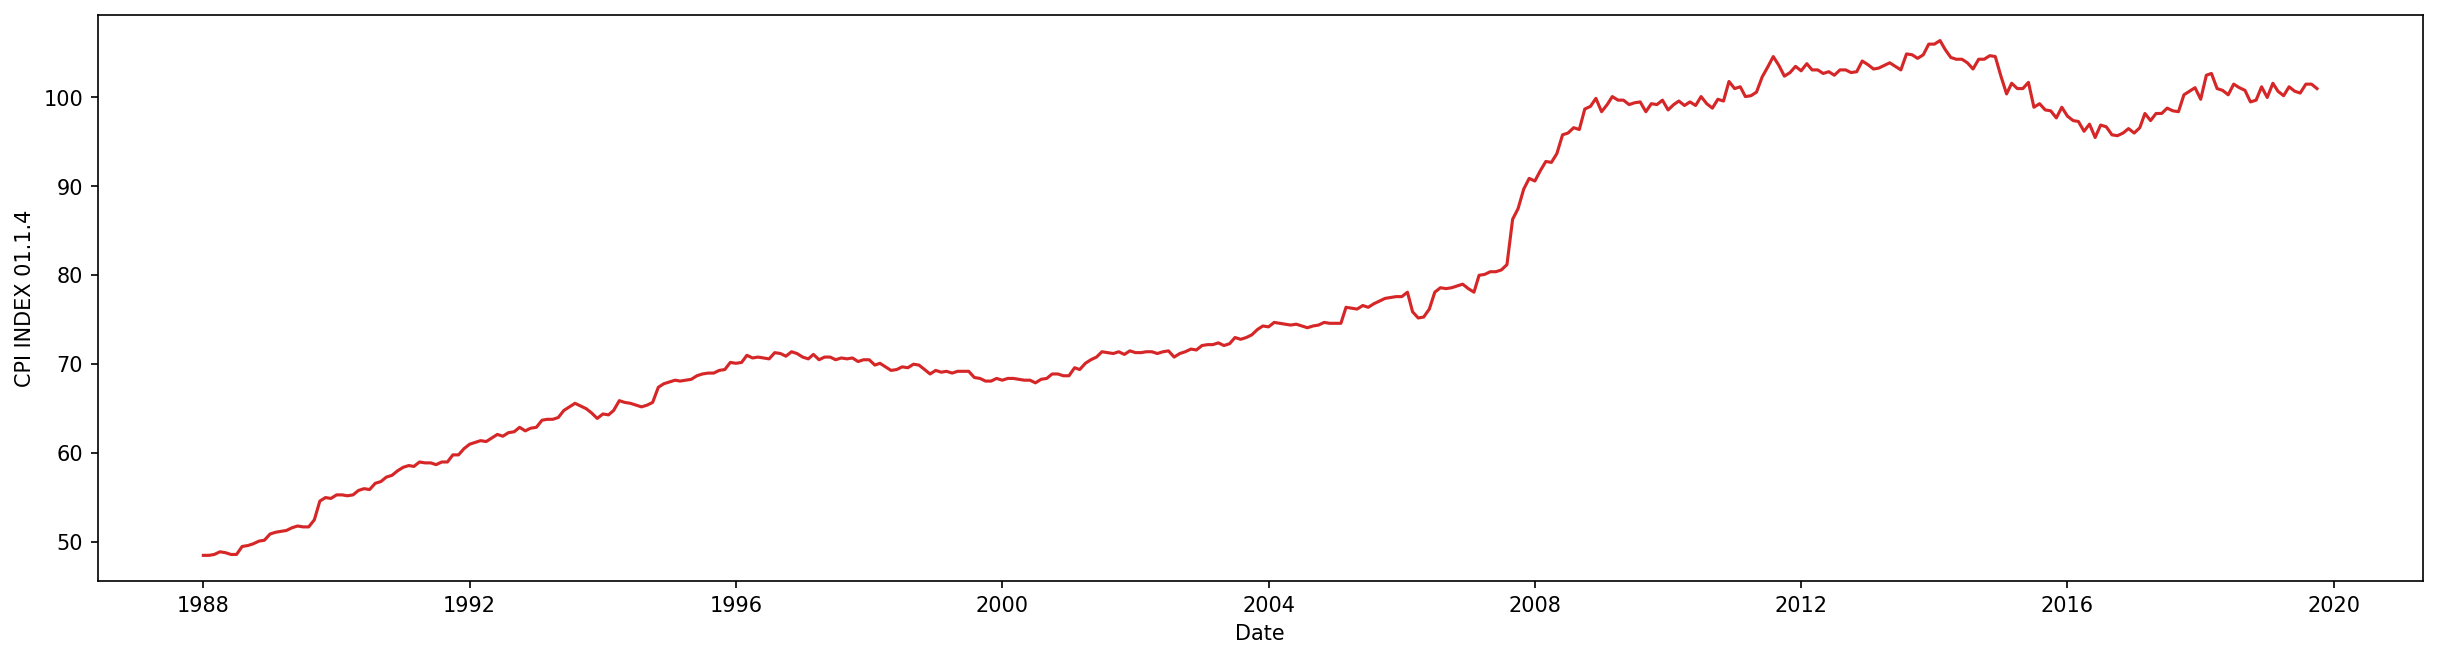

In [18]:
def plot_df(x, y, title="", xlabel='Date', ylabel='CPI INDEX 01.1.4', dpi=150):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=df2.Date, y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], title='')

### Рассмотрим данные в разрезе последних 3 лет

Индекс потребительских цен для молочки медленно рос до 2008(начало мирового кризиса), а после этого совершил скачок на 20 пунктов и после этого наблюдаются флуктуации.

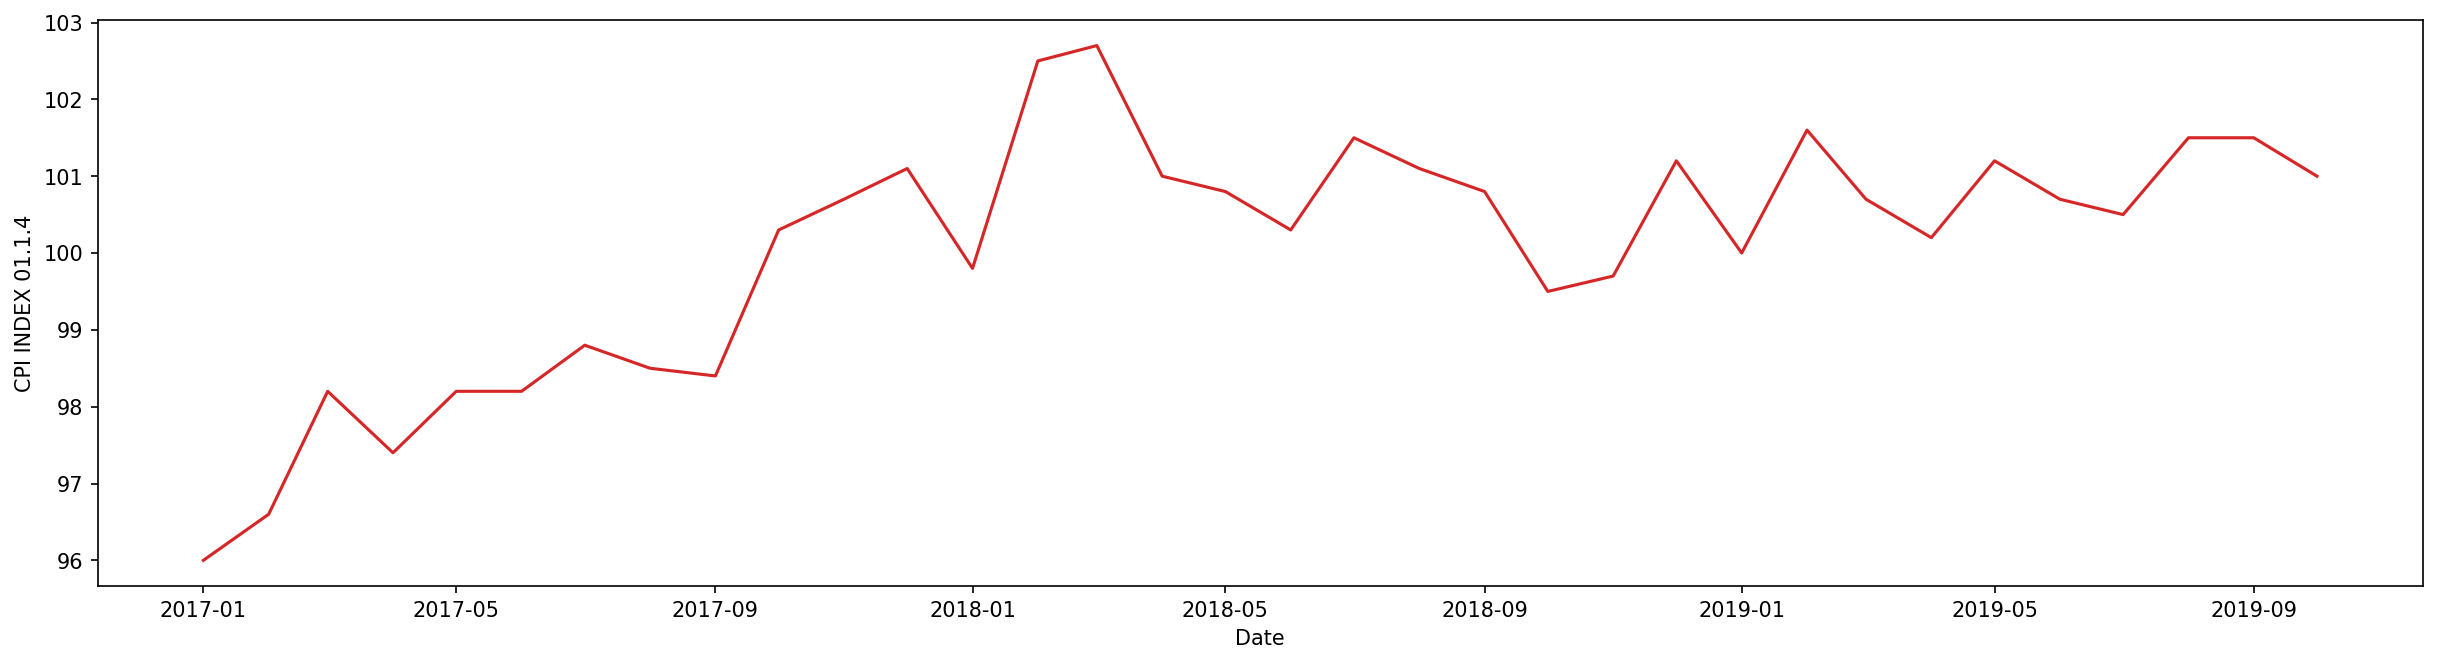

In [19]:
plot_df(x=df2.Date[df2.Year>=2017], y=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'][df2.Year>=2017], title='')

Сезонность не видна в данных

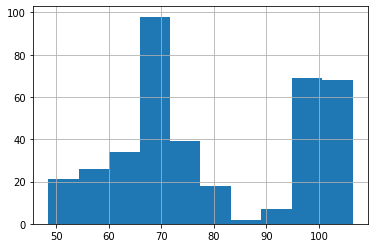

In [20]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].hist()

Гистограмма также демонстрирует бимодальность, которая разделяет моды до 2008г и после.

In [21]:
#Базовые статистики
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].describe()

count    382.000000
mean     79.796859 
std      17.296058 
min      48.500000 
25%      68.300000 
50%      74.000000 
75%      99.200000 
max      106.400000
Name: CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100, dtype: float64

In [22]:
#Базовые статистики по группе молочки, яйца и молочные субпродукты
df2.filter(regex='01.1.4').describe()

CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100  CPI INDEX 01.1.4.2 Low fat milk 2015=100  CPI INDEX 01.1.4.1 Whole milk 2015=100  CPI INDEX 01.1.4.6 Other milk products 2015=100  CPI INDEX 01.1.4.5 Cheese and curd 2015=100  CPI INDEX 01.1.4.4 Yoghurt 2015=100  CPI INDEX 01.1.4.7 Eggs 2015=100
count  382.000000                                       58.000000                                 58.00000                                58.000000                                        58.000000                                    58.000000                            58.000000                       
mean   79.796859                                        99.870690                                 104.85000                               101.434483                                       98.524138                                    99.068966                            92.113793                       
std    17.296058                                        2.348423                                  4.82887                                 3.402092                                         1.960783                                     4.387031                             4.708985                        
min    48.500000                                        96.300000                                 99.30000                                93.500000                                        94.500000                                    90.200000                            85.200000                       
25%    68.300000                                        97.600000                                 100.40000                               99.250000                                        97.325000                                    95.925000                            89.675000                       
50%    74.000000                                        100.300000                                102.40000                               102.250000                                       98.500000                                    99.150000                            90.800000                       
75%    99.200000                                        102.000000                                110.37500                               104.400000                                       99.575000                                    101.775000                           91.800000                       
max    106.400000                                       102.900000                                112.20000                               107.100000                                       103.300000                                   108.200000                           104.500000

# 2. Анализ зависимости между целевой переменной и любым другим временным рядом из данных
Базовая зависимость между переменными легче всего определить через линейную взаимосвязь,что выражается коэф.корреляции.
Найдем переменные, которые высоко коррелируют с целевой.

In [23]:
df2=df2.set_index('Date')

In [24]:
correlations=df2.corr()['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

In [25]:
correlations.abs().sort_values(ascending=False)[1:50]

CPI INDEX: Non-seasonal food (G) 2015=100                                           0.985765
CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100                    0.983588
CPI INDEX 01.1 : FOOD 2015=100                                                      0.982421
CPI INDEX 01 : FOOD AND NON-ALCOHOLIC BEVERAGES 2015=100                            0.981336
CPI INDEX 01.1.1 : BREAD & CEREALS 2015=100                                         0.979511
CPI INDEX 04.4.1 : WATER SUPPLY 2015=100                                            0.976525
CPI INDEX 01.1.2 : MEAT 2015=100                                                    0.976214
CPI INDEX: Energy and unprocessed food (SP) 2015=100                                0.975172
CPI INDEX: Unprocessed food (G) 2015=100                                            0.973907
CPI INDEX: Energy, food, alcohol and tobacco (SP) 2015=100                          0.973246
CPI INDEX: Energy and seasonal food (SP) 2015=100                     

Проверим выборочно полученные результаты и построим графики(если точки лежат на одной прямой, то это будет означать, что связь между переменными действительно линейная)

Text(0.5, 1.0, 'Correlation')

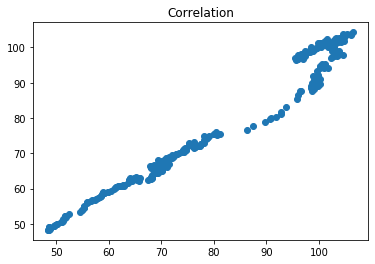

In [26]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Non-seasonal food (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

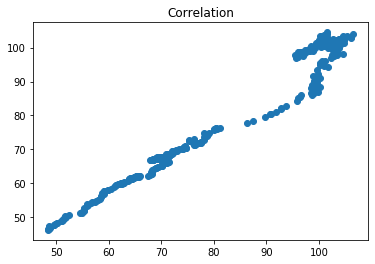

In [27]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX: Processed food & non-alcoholic beverages (G) 2015=100']);
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

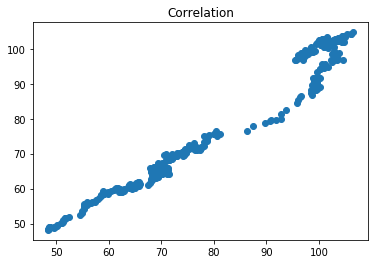

In [28]:
plt.scatter(
    df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'],
    df2['CPI INDEX 01.1 : FOOD 2015=100']);
plt.title('Correlation')

In [34]:
df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'].autocorr()

0.9991344197599843

Автокорреляция очень сильная, попробуем провести декомпозицию и построим АФКФ и ЧАКФ.

Критерий Дики-Фуллера: p=0.587382


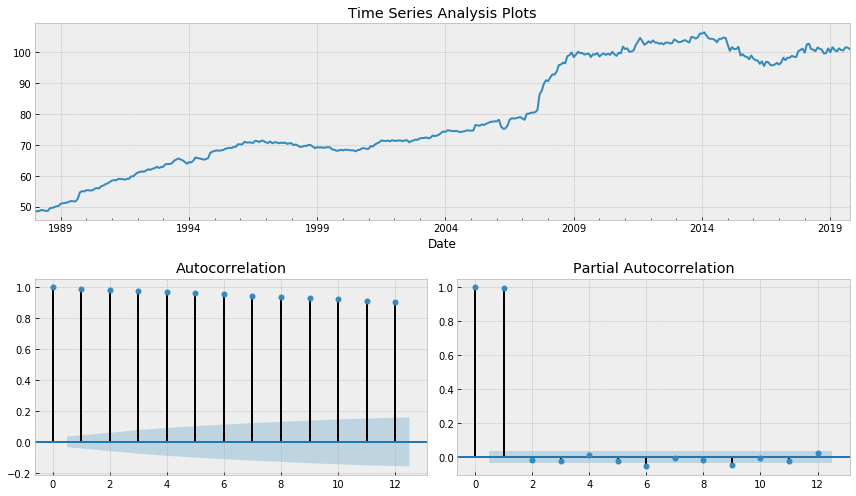

In [36]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], lags=12)

Критерий Дики-Фуллера:
H0: Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.
H1: Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры.
Т.к. p=0.587382>0.05 т.о. мы не можем отклонить нулевую гипотезу, следовательно ряд является нестационарным.

Проведем декомпозицию по аддидивной модели выделяя тренд, сезонность и остатки

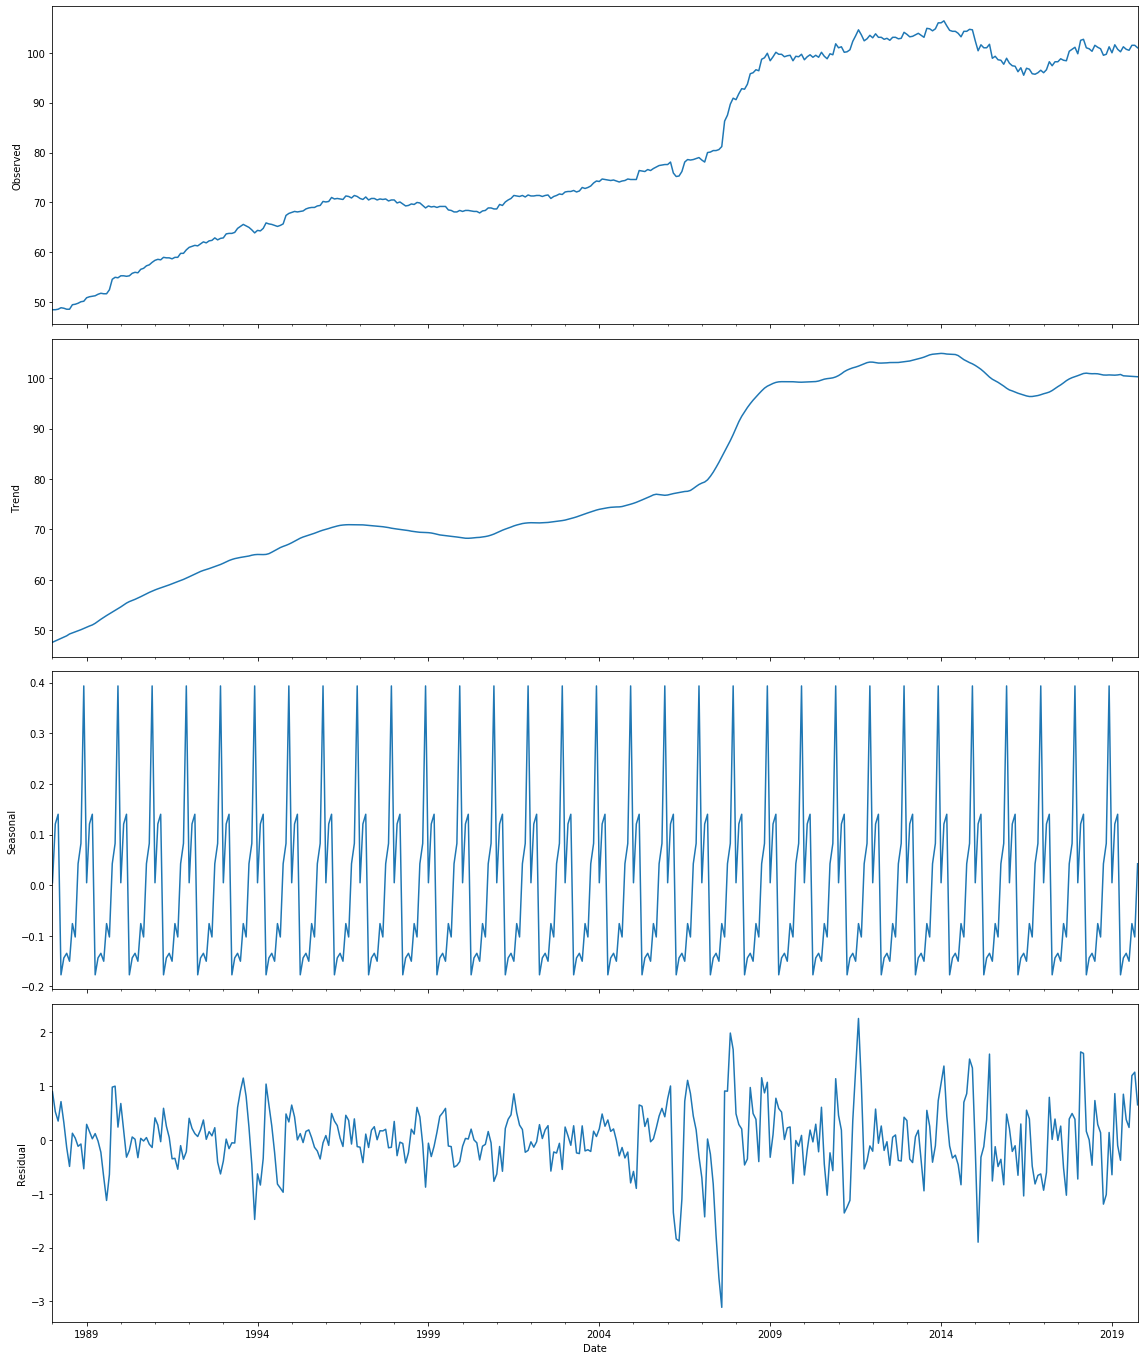

In [80]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100'], model='additive', 
                            #freq=12
                            extrapolate_trend='freq'
                           )
result.plot()
plt.rcParams["figure.figsize"] = [16,19]
plt.show()

Хотя декомпозиция ряда и выловила сезонную составляющую, но она похожа скорее на шум.

# 3. Построим предиктивную модель как временного ряда(без предикторов)

In [45]:
df3=df2['CPI INDEX 01.1.4 : MILK, CHEESE & EGGS 2015=100']

# 3.1 Проведем классический анализ временного ряда и построим модель АРИМА

In [90]:
#Разделим данные на обучающее и тестовое множество-10%
train = df3[:int(0.9*(len(df3)))]
test = df3[int(0.9*(len(df3))):]
print(train.shape)
print(test.shape)

(343,)
(39,)


In [91]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=713.598, BIC=732.772, Fit time=0.607 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=718.099, BIC=725.768, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=721.292, BIC=736.631, Fit time=0.141 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=721.439, BIC=736.778, Fit time=0.149 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=714.040, BIC=737.049, Fit time=1.154 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=711.601, BIC=726.941, Fit time=0.237 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=719.961, BIC=731.466, Fit time=0.062 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=718.359, BIC=737.533, Fit time=0.138 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=719.927, BIC=731.431, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 

In [84]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

print(model.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -739.943
Date:                Thu, 12 Dec 2019   AIC                           1487.885
Time:                        00:44:30   BIC                           1497.884
Sample:                             0   HQIC                          1491.917
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    697.5482    226.238      3.083      0.002     254.130    1140.966
ar.L1          1.1552      0.070     16.557      0.000       1.018       1.292
ar.L2         -0.6161      0.096     -6.428      0.0

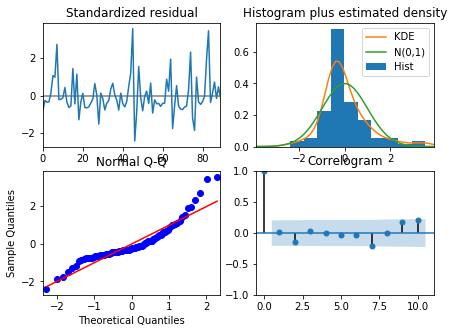

In [88]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

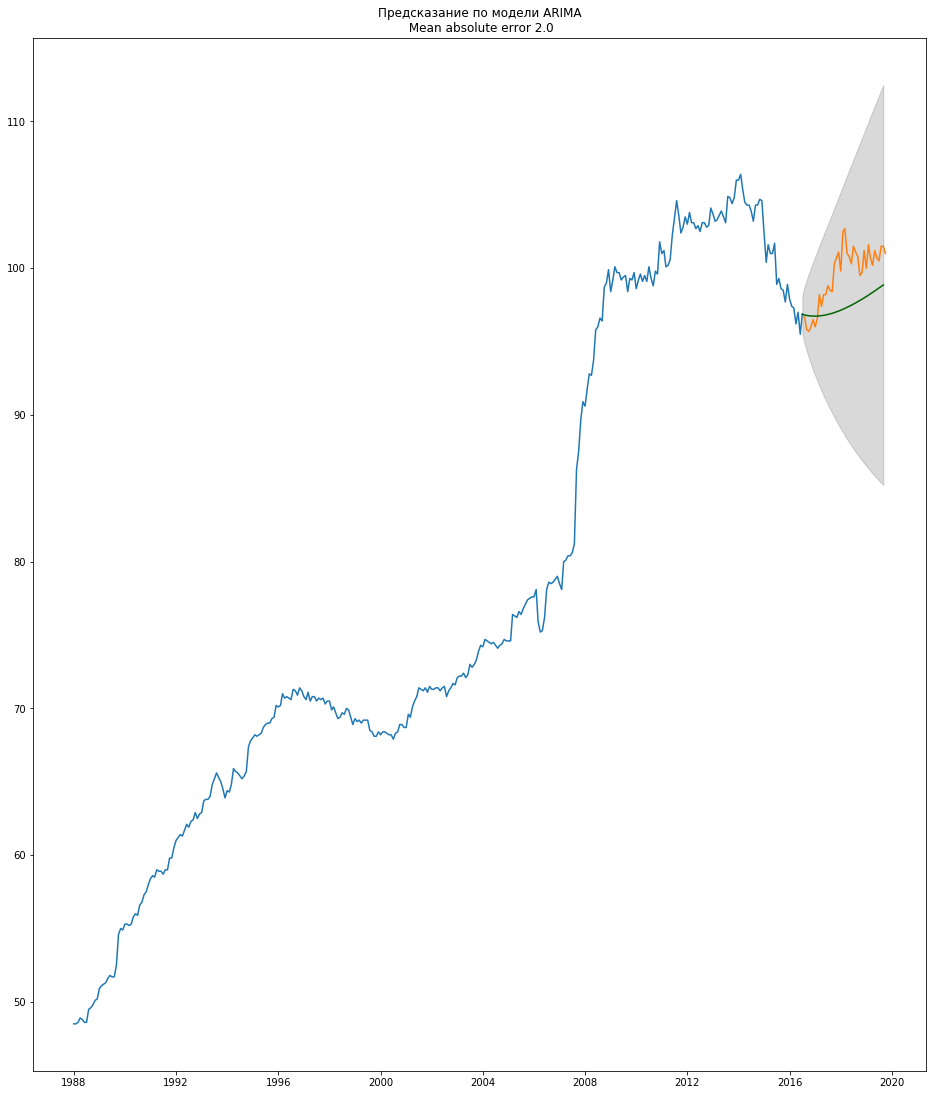

In [136]:
# Предсказание
n_periods = 39
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# создадим серию предсказаний для построения графика
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(test)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Предсказание по модели ARIMA\n Mean absolute error {}".format(round(mean_absolute_error(fc_series, test))))
plt.show()

Можно было внести шум который получился от декомпозиции в качестве сезонных индексов, но решил ограничиться уже этим

# 3.2 Построим линейную регрессию используя лаги

In [102]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)


    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = prepareData(df3, test_size=0.2, lag_start=12, lag_end=36)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

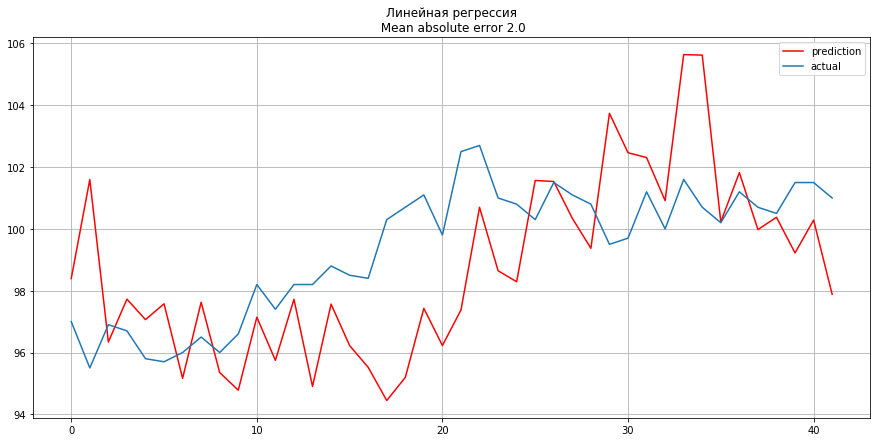

In [140]:
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Линейная регрессия\n Mean absolute error {}".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

Линейная регрессионная модель ошиблась на 2 пункта и уловила тренд на повышение, что для таких данных очень хорошо.